Recently I have a friend asking me how to fit a function to some observational data using python. Well, it depends on whether you have a function form in mind. If you have one, then it is easy to do that. But even you don't know the form of the function you want to fit, you can still do it fairly easy. Here are some examples. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn-poster')

## If you can tell the function form from the data

For example, if I have the following data that actually generated from the function $3e^{-0.05x}+12$, but with some noise. When we see this dataset, we can tell it might be generated from a exponential function.

In [31]:
np.random.seed(42)

x = np.arange(-10, 10, 0.1)

# true data generated by this function
y = 3 * np.exp(-0.05*x) + 12

# adding noise to the true data
y_noise = y + np.random.normal(0, 0.2, size = len(y))

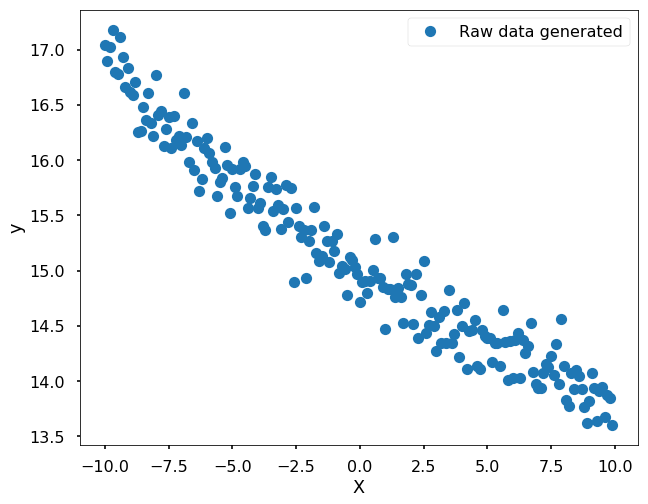

In [32]:
plt.figure(figsize = (10, 8))
plt.plot(x, y_noise, 'o', label = 'Raw data generated')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Since we have the function form in mind already, let's fit the data using scipy function - [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [33]:
from scipy.optimize import curve_fit

In [34]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [35]:
popt, pcov = curve_fit(func, x, y_noise)

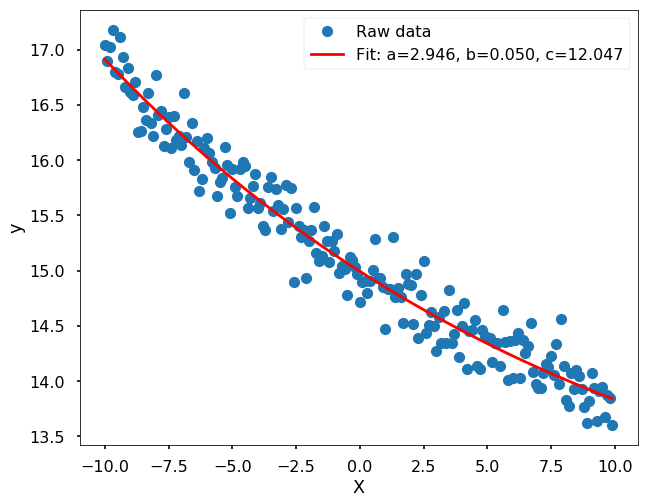

In [37]:
plt.figure(figsize = (10, 8))

plt.plot(x, y_noise, 'o',
    label='Raw data')

plt.plot(x, func(x, *popt), 'r',
    label='Fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.legend()

plt.xlabel('X')
plt.ylabel('y')

plt.show()

## More complicated case, you don't know the funciton form

For a more complicated case that we can not easily guess the form of the function, we could use a Spline to fit the data. For example, we could use [UnivariateSpline](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.interpolate.UnivariateSpline.html). 

In [38]:
from scipy.interpolate import UnivariateSpline

In [49]:
np.random.seed(42)

x = np.arange(-10, 10, 0.1)

# true data generated by this function
y = 3 * np.exp(-0.05*x) + 12 + 1.4 * np.sin(1.2*x) + 2.1 * np.sin(-2.2*x + 3)

# adding noise to the true data
y_noise = y + np.random.normal(0, 0.5, size = len(y))

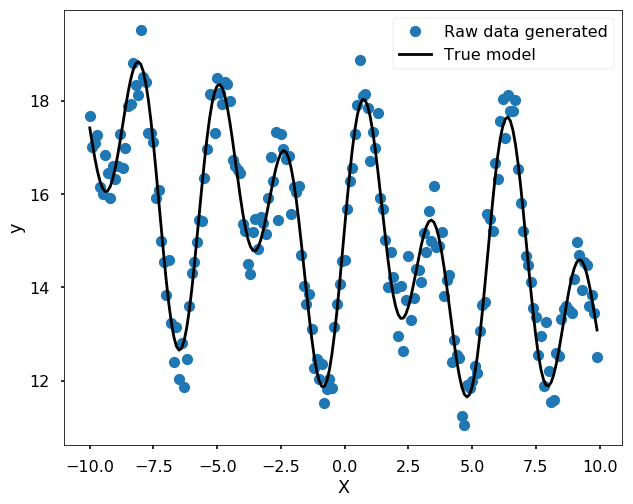

In [50]:
plt.figure(figsize = (10, 8))
plt.plot(x, y_noise, 'o', label = 'Raw data generated')
plt.plot(x, y, 'k', label = 'True model')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [53]:
# Note, you need play with the s - smoothing factor
s = UnivariateSpline(x, y_noise, s=15)
xs = np.linspace(-10, 10, 100)
ys = s(xs)

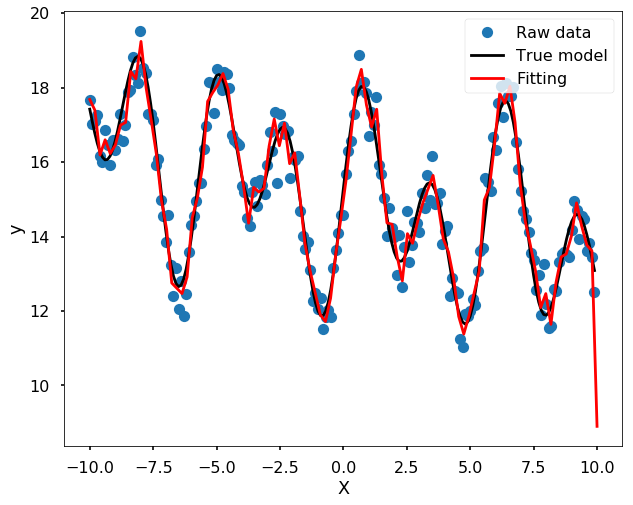

In [55]:
plt.figure(figsize = (10, 8))
plt.plot(x, y_noise, 'o', label = 'Raw data')
plt.plot(x, y, 'k', label = 'True model')
plt.plot(xs, ys, 'r', label = 'Fitting')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc = 1)
plt.show()

## Of course, you could also use Machine Learning algorithms

Many machine learning algorithms could do the job as well, you could treat this as a regression problem in machine learning, and train some model to fit the data well. I will show you two methods here - Random forest and 

#### Use Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

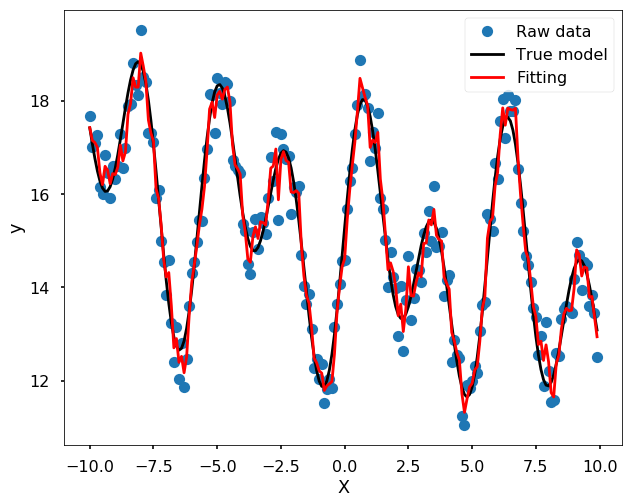

In [69]:
# fit the model and get the estimation for each data points
yfit = RandomForestRegressor(50, random_state=42).fit(x[:, None], y_noise).predict(x[:, None])

plt.figure(figsize = (10,8))
plt.plot(x, y_noise, 'o', label = 'Raw data')
plt.plot(x, y, 'k', label = 'True model')
plt.plot(x, yfit, '-r', label = 'Fitting', zorder = 10)
plt.legend()
plt.xlabel('X')
plt.ylabel('y')

plt.show()

#### Use ANN

In [60]:
from sklearn.neural_network import MLPRegressor

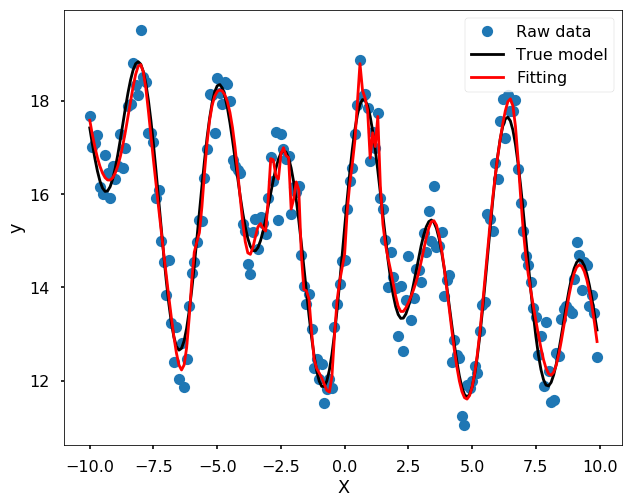

In [72]:
mlp = MLPRegressor(hidden_layer_sizes=(100,100,100), max_iter = 5000, solver='lbfgs', \
                   alpha=0.01, activation = 'tanh', random_state = 8)

yfit = mlp.fit(x[:, None], y_noise).predict(x[:, None])

plt.figure(figsize = (10,8))
plt.plot(x, y_noise, 'o', label = 'Raw data')
plt.plot(x, y, 'k', label = 'True model')
plt.plot(x, yfit, '-r', label = 'Fitting', zorder = 10)
plt.legend()

plt.xlabel('X')
plt.ylabel('y')

plt.show()